# Escenarios experimentales Internetworking
# RANDOM FOREST ESCENARIO A
Presentado por: Jonathan Toapanta Fecha: 08/03/2023

In [15]:
!pip install --upgrade scikit-learn

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
# cargar datos y normalizar
url = 'https://raw.githubusercontent.com/jonathan-elian-toapanta/INTERNETWORKING/main/ESCENARIOS/ScenarioA.csv'
df = pd.read_csv(url, low_memory=False)


In [17]:
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:,feature_name] = pd.to_numeric(df.loc[:,feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if (max_value - min_value) > 0:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value)
    return df

dataframe = df.reindex(np.random.permutation(df.index)).copy()


In [18]:
keys = dataframe.keys()
data_to_process = dataframe[keys[4:len(keys)-1]].copy()
x_normalised = dfNormalize(data_to_process)


In [19]:
y = dataframe['label']
change_labels = lambda x: 1 if x == 'nonTOR' else 0
y_normalised = dataframe['label'].apply(change_labels)


In [20]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_normalised, y_normalised, test_size=0.2, random_state=42)

dataframe.dropna(inplace=True)


In [21]:
imputer = SimpleImputer()
imputer.fit(x_train)
x_train = imputer.transform(x_train)

In [22]:
# Implementación del modelo Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt'],  # Cambia 'auto' por 'sqrt'
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [23]:
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [24]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

model = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                               max_features=best_params['max_features'], 
                               max_depth=best_params['max_depth'], 
                               min_samples_split=best_params['min_samples_split'], 
                               min_samples_leaf=best_params['min_samples_leaf'], 
                               random_state=42)

model.fit(x_train, y_train)

RandomForestClassifier(max_depth=40, n_estimators=200, random_state=42)

In [25]:
# Realizar predicciones en conjunto de prueba
x_test = imputer.transform(x_test)
y_pred = model.predict(x_test)

In [26]:
# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Mejores hiperparámetros:", best_params)
print("Mejor puntaje:", best_score)

Accuracy: 0.9791405616569617
Precision: 0.9829479287972052
Recall: 0.9934426229508196
F1 score: 0.9881674123008738
Mejores hiperparámetros: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor puntaje: 0.9783662079075951


# Escenarios experimentales Internetworking CNN ESCENARIO A
Presentado por: Jonathan Toapanta
Fecha: 23/02/2023


In [ ]:
import keras
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import numpy as np


In [ ]:
# cargar datos y normalizar
url = 'https://raw.githubusercontent.com/jonathan-elian-toapanta/INTERNETWORKING/main/ESCENARIOS/ScenarioA.csv'
df = pd.read_csv(url, low_memory=False)

In [ ]:
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:,feature_name] = pd.to_numeric(df.loc[:,feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if (max_value - min_value) > 0:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value)
    return df

dataframe = df.reindex(np.random.permutation(df.index)).copy()

In [ ]:
keys = dataframe.keys()
data_to_process = dataframe[keys[4:len(keys)-1]].copy()
x_normalised = dfNormalize(data_to_process)

In [ ]:
y = dataframe['label']
change_labels = lambda x: 1 if x == 'nonTOR' else 0
y_normalised = dataframe['label'].apply(change_labels)


In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_normalised, y_normalised, test_size=0.2, random_state=42)


In [ ]:
# Reshape the data to fit the input shape of the CNN
x_train = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)


In [ ]:
# Convert the labels to binary format
y_train = np.array(y_train).reshape((-1,1))
y_test = np.array(y_test).reshape((-1,1))


In [ ]:
import numpy as np

# Verificar si hay valores nulos en x_train e y_train
print(np.isnan(x_train).any())
print(np.isnan(y_train).any())

# Reemplazar valores nulos por cero
x_train = np.nan_to_num(x_train, nan=0.0)
y_train = np.nan_to_num(y_train, nan=0.0)

True
False


In [ ]:
# Definir el modelo de la CNN
def create_model():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model
# Crear el modelo
model = create_model()

In [ ]:
# Entrenar el modelo
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1696/1696 [==============================] - 39s 18ms/step - loss: 0.1578 - accuracy: 0.9369 - val_loss: nan - val_accuracy: 0.9367
Epoch 2/10
1696/1696 [==============================] - 23s 13ms/step - loss: 0.1335 - accuracy: 0.9445 - val_loss: nan - val_accuracy: 0.9351
Epoch 3/10
1696/1696 [==============================] - 22s 13ms/step - loss: 0.1261 - accuracy: 0.9482 - val_loss: nan - val_accuracy: 0.9464
Epoch 4/10
1696/1696 [==============================] - 24s 14ms/step - loss: 0.1226 - accuracy: 0.9497 - val_loss: nan - val_accuracy: 0.9433
Epoch 5/10
1696/1696 [==============================] - 23s 14ms/step - loss: 0.1182 - accuracy: 0.9519 - val_loss: nan - val_accuracy: 0.9426
Epoch 6/10
1696/1696 [==============================] - 24s 14ms/step - loss: 0.1164 - accuracy: 0.9522 - val_loss: nan - val_accuracy: 0.9547
Epoch 7/10
1696/1696 [==============================] - 23s 13ms/step - loss: 0.1134 - accuracy: 0.9537 - val_loss: nan - val_accuracy: 0.9506

In [ ]:
# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy))


424/424 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.8994
Accuracy: 0.90


424/424 [==============================] - 4s 10ms/step


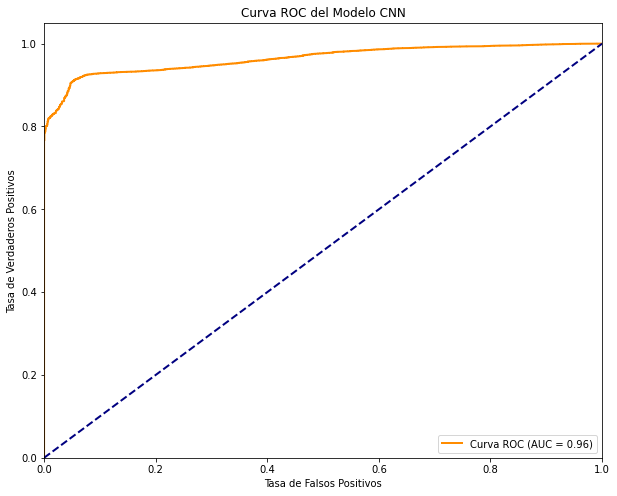

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Reemplazar valores nulos por cero
x_test = np.nan_to_num(x_test, nan=0.0)
y_test = np.nan_to_num(y_test, nan=0.0)

# Predice las probabilidades de las clases para los datos de prueba
y_pred_prob = model.predict(x_test)

# Calcula la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Modelo CNN')
plt.legend(loc="lower right")
plt.show()

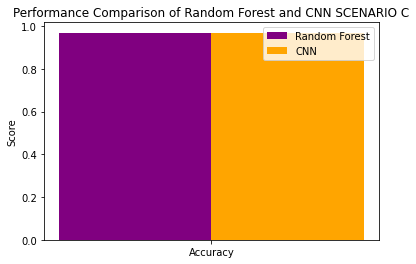

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and their scores
metrics = ['Accuracy']
rf_scores = [accuracy_score(y_test, y_pred)]
cnn_scores = [accuracy]

# Set the bar width
bar_width = 0.35

# Set the positions of the bars
bar_positions_rf = np.arange(len(metrics))
bar_positions_cnn = bar_positions_rf + bar_width

# Create the bar plots
plt.bar(bar_positions_rf, rf_scores, width=bar_width,color='purple', label='Random Forest')
plt.bar(bar_positions_cnn, cnn_scores, width=bar_width,color='orange' ,label='CNN')

# Add labels and title
plt.xticks(bar_positions_rf + bar_width / 2, metrics)
plt.ylabel('Score')
plt.title('Performance Comparison of Random Forest and CNN SCENARIO C')

# Add legend and show the plot
plt.legend()
plt.show()